In [1]:
import sys
sys.path.insert(0, '../../wildlife-tools')
sys.path.insert(0, '..')

import os
import numpy as np
import pandas as pd
from wildlife_datasets import datasets

In [2]:
license_conversion = {
    'Missing': 'None',
    'Other': 'Other',
    'Attribution 4.0 International (CC BY 4.0)': 'CC BY 4.0',
    'Creative Commons Attribution 4.0 International': 'CC BY 4.0',
    'Attribution-NonCommercial-ShareAlike 4.0 International': 'CC BY-NC-SA 4.0',
    'Non-Commercial Government Licence for public sector information': 'NC-Government',
    'Community Data License Agreement – Permissive': 'CDLA-Permissive-1.0',
    'Community Data License Agreement – Permissive, Version 1.0': 'CDLA-Permissive-1.0',
    'MIT License': 'MIT',
    'Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0)': 'CC BY-NC-SA 4.0',
    'Attribution-ShareAlike 3.0 Unported' : 'CC BY-SA 3.0',
    'Attribution-ShareAlike 4.0 International (CC BY-SA 4.0)': 'CC BY-SA 4.0',
}

In [3]:
def getFolderSize(folder):
    total_size = os.path.getsize(folder)
    for item in os.listdir(folder):
        itempath = os.path.join(folder, item)
        if os.path.isfile(itempath):
            total_size += os.path.getsize(itempath)
        elif os.path.isdir(itempath):
            total_size += getFolderSize(itempath)
    return total_size

def rename_index(df):
    rename = {}
    for dataset_name in df.index:
        try:
            metadata = eval(f'datasets.{dataset_name}.metadata')
            citation = " \cite{" + metadata['cite'] + "}"
        except:
            citation = ''
        rename[dataset_name] = dataset_name + citation
    return df.rename(index=rename)

In [4]:
new_root = '/data/wildlife_datasets/data/WildlifeReID-10k'
new_root_images = os.path.join(new_root, 'images')

df = pd.read_csv(os.path.join(new_root, 'metadata.csv'))

In [5]:
summary_species = {}
for name, df_red in df.groupby('species'):
    summary_species[name] = {
        'images': len(df_red),
        'individuals': df_red['identity'].nunique(),
    }
summary_species = pd.DataFrame(summary_species).T
summary_species.loc['TOTAL'] = summary_species.sum()
summary_species

images  individuals
bird         35077           40
cat          13021          509
chimpanzee    6771           95
cow          20724          375
dog          10020         1584
doplhin       2657           82
fish          6672            6
giraffe       2032          329
hyena         3129          256
leopard       6806          430
nyala         1942          237
panda         6874           50
polar bear   13918           13
sea star      2187           95
sea turtle   21532         2703
seal          2080           57
shark         7693          543
tiger         5415          182
whale         8559          788
zebra        37153         1970
TOTAL       214262        10344

In [6]:
summary_datasets = {}
for name, df_red in df.groupby('dataset'):
    metadata = eval(f'datasets.{name}.metadata')
    if 'licenses' in metadata:
        license = metadata['licenses']
    else:
        license = 'Missing'    
    summary_datasets[name] = {
        'images': len(df_red),
        'individuals': df_red['identity'].nunique(),
        'size (GB)': np.round(getFolderSize(os.path.join(new_root_images, name)) / 1024**3, 2),
        'license': license_conversion[license],
    }

summary_datasets = pd.DataFrame(summary_datasets).T.sort_index(key=lambda x: x.str.lower())
summary_datasets.loc['TOTAL'] = summary_datasets.sum()
summary_datasets.loc['TOTAL', 'license'] = ''
for col in ['images', 'individuals']:
    summary_datasets[col] = summary_datasets[col].astype(int)
for col in ['size (GB)']:
    summary_datasets[col] = summary_datasets[col].astype(float)    
summary_datasets

images  individuals  size (GB)              license
AAUZebraFish           6672            6       0.37            CC BY 4.0
AerialCattle2017       4700           23       0.03        NC-Government
ATRW                   5415          182       0.27      CC BY-NC-SA 4.0
BelugaID               8559          788       0.26  CDLA-Permissive-1.0
BirdIndividualID      52274           50       0.50                 None
CatIndividualImages   13021          509       9.01            CC BY 4.0
CowDataset             1485           13       1.66            CC BY 4.0
Cows2021               8670          179       0.11        NC-Government
CTai                   4662           71       0.33                Other
CZoo                   2109           24       0.24                Other
DogFaceNet             8363         1393       0.08                  MIT
FriesianCattle2015      193           25       0.03        NC-Government
FriesianCattle2017      940           89       0.18        NC-Government
Giraffes               1393          178       0.09                 None
GiraffeZebraID         6925         2056       1.03  CDLA-Permissive-1.0
HyenaID2022            3129          256       0.44  CDLA-Permissive-1.0
IPanda50               6874           50       0.35                 None
LeopardID2022          6806          430       0.85  CDLA-Permissive-1.0
MPDD                   1657          191       0.02            CC BY 4.0
NDD20                  2657           82       0.07      CC BY-NC-SA 4.0
NyalaData              1942          237       0.46                 None
OpenCows2020           4736           46       0.04        NC-Government
PolarBearVidID        13918           13       0.07            CC BY 4.0
SealID                 2080           57       0.26            CC BY 4.0
SeaStarReID2023        2187           95       1.66  CDLA-Permissive-1.0
SeaTurtleID2022        8729          438       0.13                Other
SMALST                12850           10       0.84                  MIT
StripeSpotter           820           45       0.02         CC BY-SA 3.0
WhaleSharkID           7693          543       1.57  CDLA-Permissive-1.0
ZindiTurtleRecall     12803         2265       2.09         CC BY-SA 4.0
TOTAL                214262        10344      23.06

In [7]:
print(summary_species.to_latex())

\begin{tabular}{lrr}
\toprule
 & images & individuals \\
\midrule
bird & 35077 & 40 \\
cat & 13021 & 509 \\
chimpanzee & 6771 & 95 \\
cow & 20724 & 375 \\
dog & 10020 & 1584 \\
doplhin & 2657 & 82 \\
fish & 6672 & 6 \\
giraffe & 2032 & 329 \\
hyena & 3129 & 256 \\
leopard & 6806 & 430 \\
nyala & 1942 & 237 \\
panda & 6874 & 50 \\
polar bear & 13918 & 13 \\
sea star & 2187 & 95 \\
sea turtle & 21532 & 2703 \\
seal & 2080 & 57 \\
shark & 7693 & 543 \\
tiger & 5415 & 182 \\
whale & 8559 & 788 \\
zebra & 37153 & 1970 \\
TOTAL & 214262 & 10344 \\
\bottomrule
\end{tabular}



In [8]:
print(rename_index(summary_datasets).to_latex(float_format="%.2f"))

\begin{tabular}{lrrrl}
\toprule
 & images & individuals & size (GB) & license \\
\midrule
AAUZebraFish \cite{bruslund2020re} & 6672 & 6 & 0.37 & CC BY 4.0 \\
AerialCattle2017 \cite{andrew2017visual} & 4700 & 23 & 0.03 & NC-Government \\
ATRW \cite{li2019atrw} & 5415 & 182 & 0.27 & CC BY-NC-SA 4.0 \\
BelugaID \cite{belugaid} & 8559 & 788 & 0.26 & CDLA-Permissive-1.0 \\
BirdIndividualID \cite{ferreira2020deep} & 52274 & 50 & 0.50 & None \\
CatIndividualImages \cite{catindividuals} & 13021 & 509 & 9.01 & CC BY 4.0 \\
CowDataset \cite{cowdataset} & 1485 & 13 & 1.66 & CC BY 4.0 \\
Cows2021 \cite{gao2021towards} & 8670 & 179 & 0.11 & NC-Government \\
CTai \cite{freytag2016chimpanzee} & 4662 & 71 & 0.33 & Other \\
CZoo \cite{freytag2016chimpanzee} & 2109 & 24 & 0.24 & Other \\
DogFaceNet \cite{mougeot2019deep} & 8363 & 1393 & 0.08 & MIT \\
FriesianCattle2015 \cite{andrew2016automatic} & 193 & 25 & 0.03 & NC-Government \\
FriesianCattle2017 \cite{andrew2017visual} & 940 & 89 & 0.18 & NC-Govern

/home/sadda/Projects/wildlife-datasets/baselines/../wildlife_datasets/datasets/datasets.py:305: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


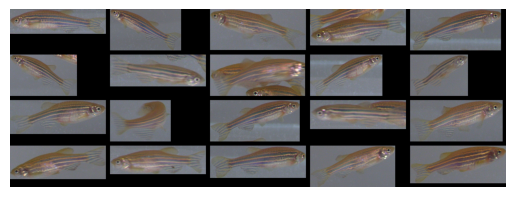

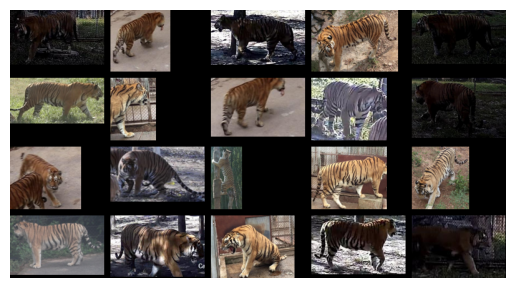

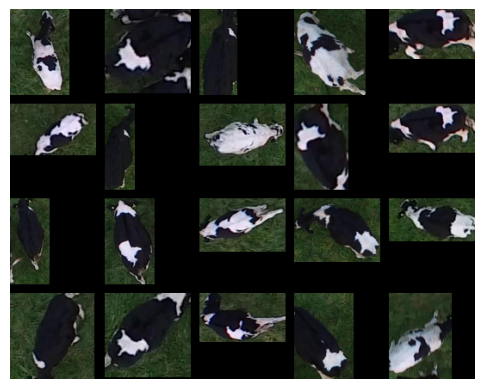

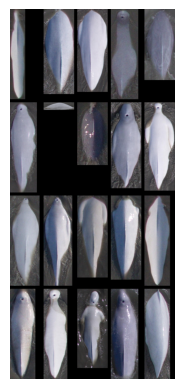

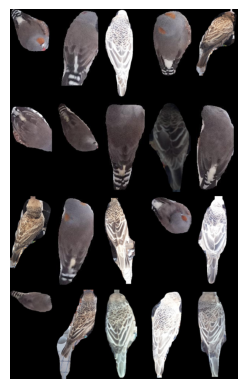

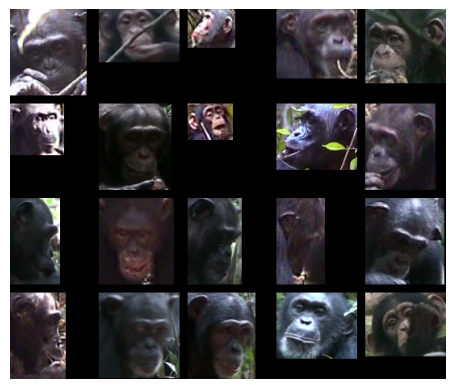

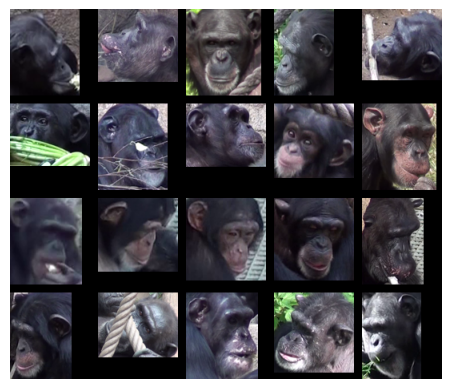

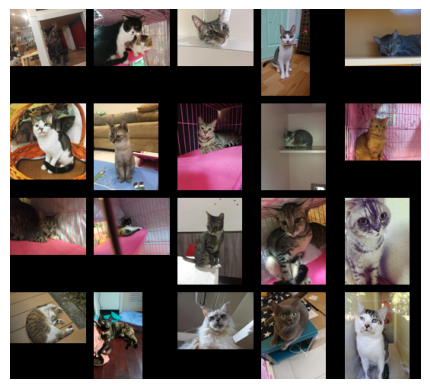

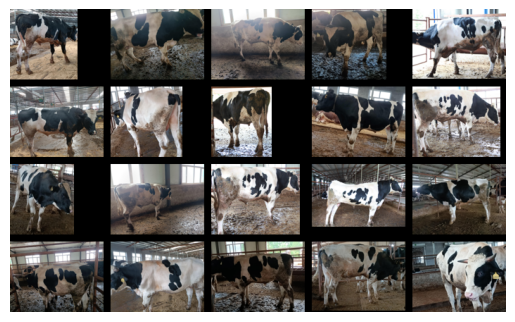

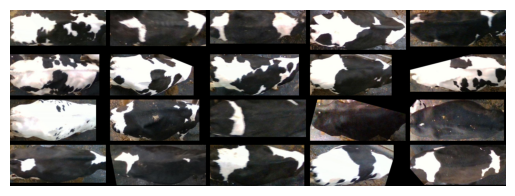

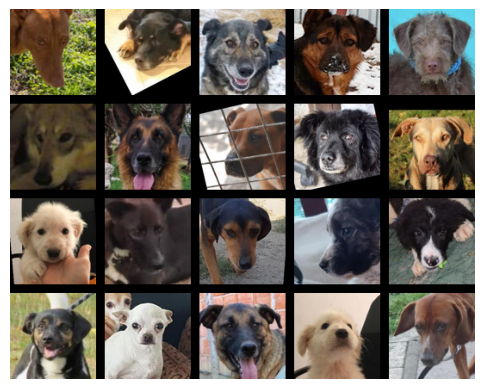

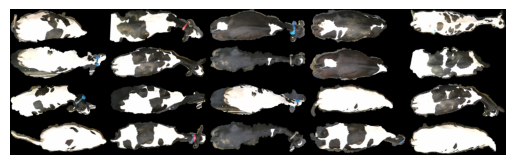

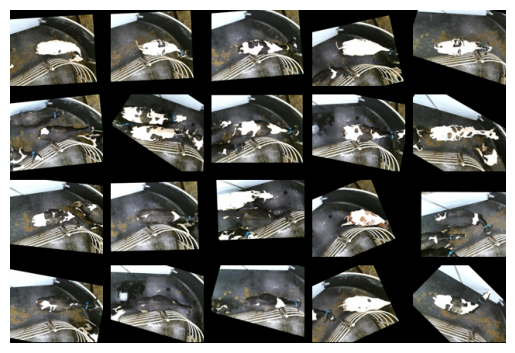

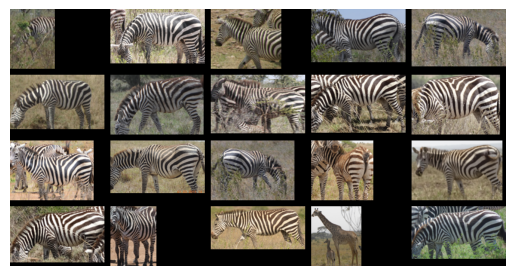

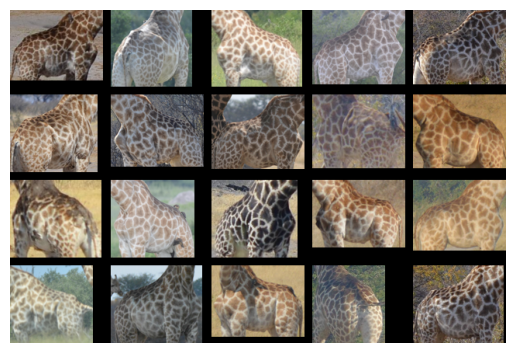

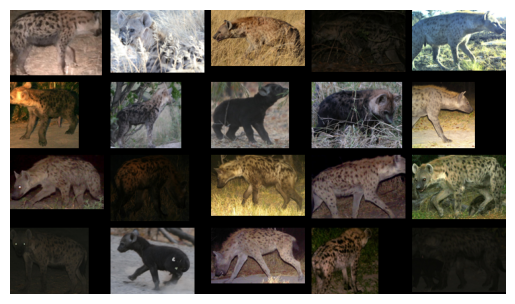

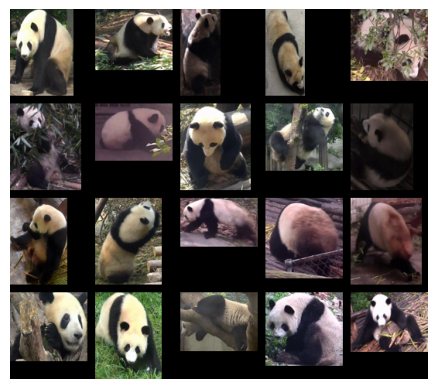

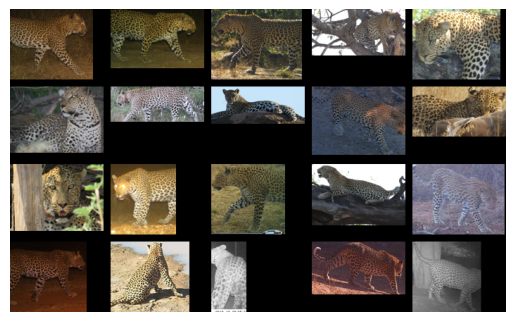

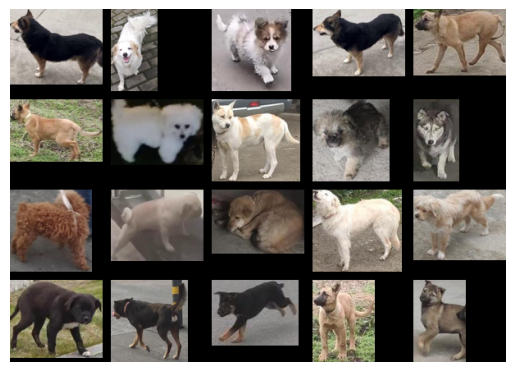

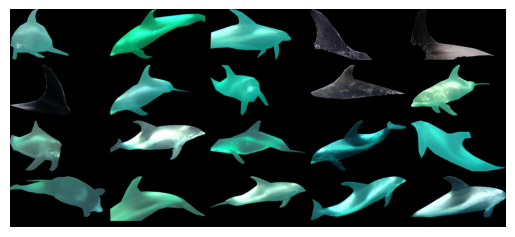

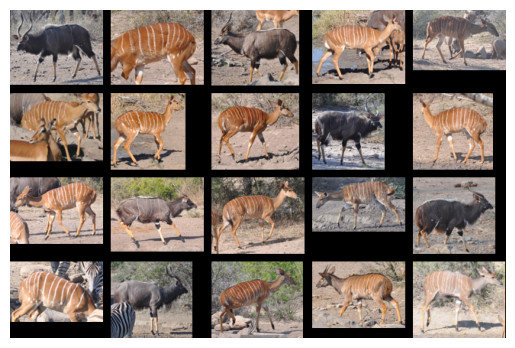

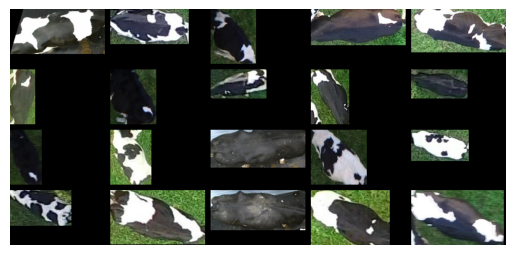

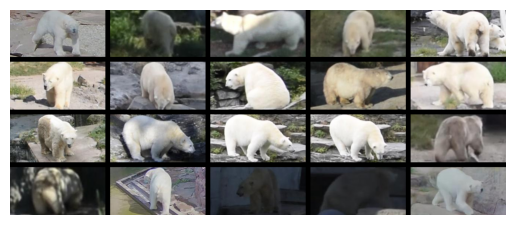

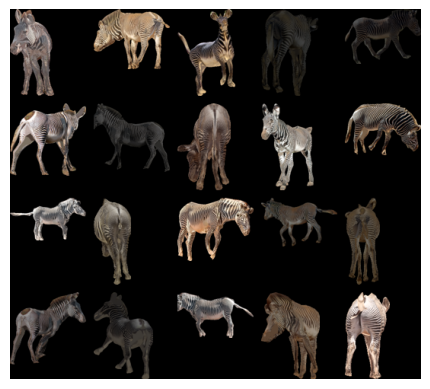

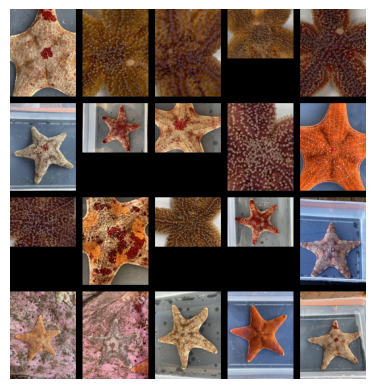

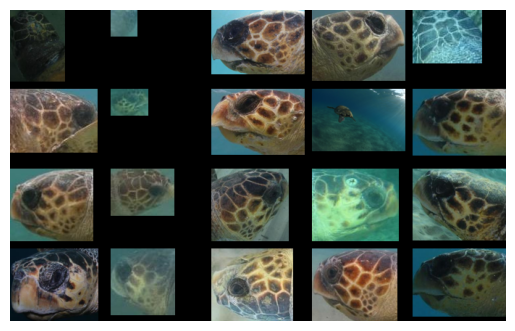

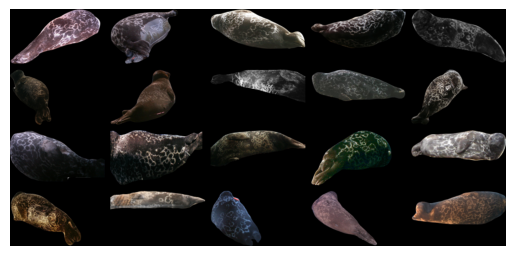

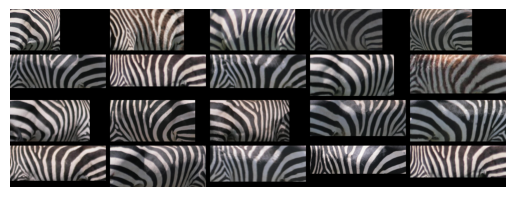

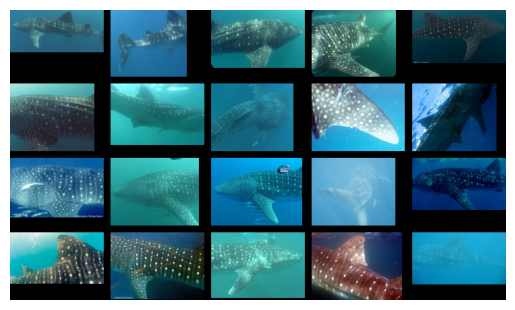

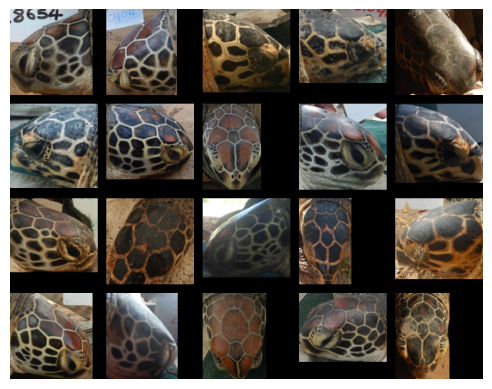

In [9]:
for name, df_red in df.groupby('dataset'):
    d = datasets.DatasetFactory(f'{new_root_images}', df=df_red)
    d.plot_grid(n_cols=5, n_rows=4, rotate=False);